Task 1: File Management Script

    Write a Bash script that
    Creates a directory named "backup" in the user's home directory
    Copies all .txt files from the current directory into the "backup" directory
    Appends the current date and time to the filenames of the copied files

 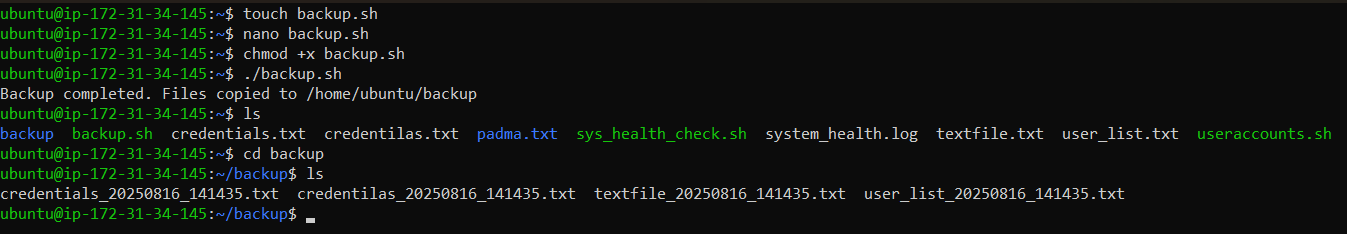

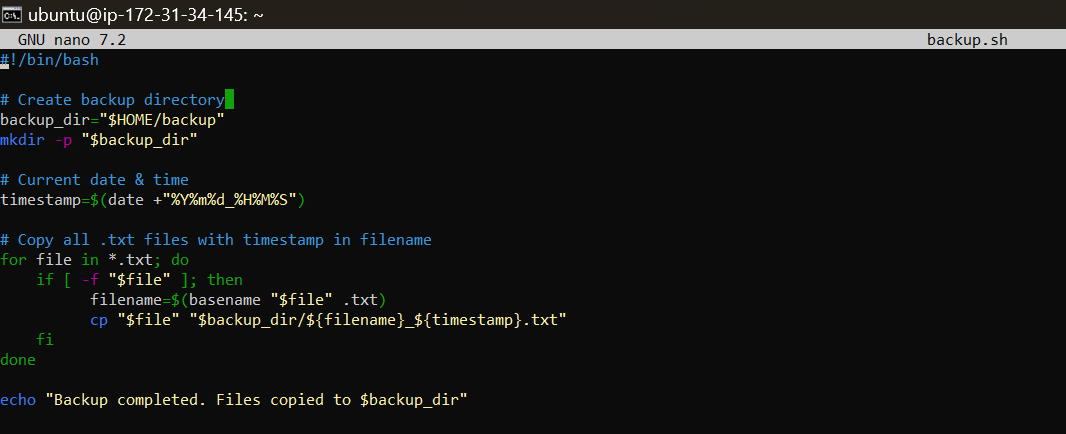




 Task 2: System Health Check

    Create a script that
    Checks the system’s CPU and memory usage
    Reports if the CPU usage is above 80% or if the available memory is below 20%
    Logs the results to a file named system_health.log.
      
      
   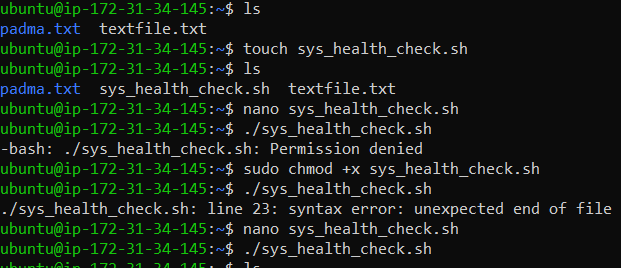

   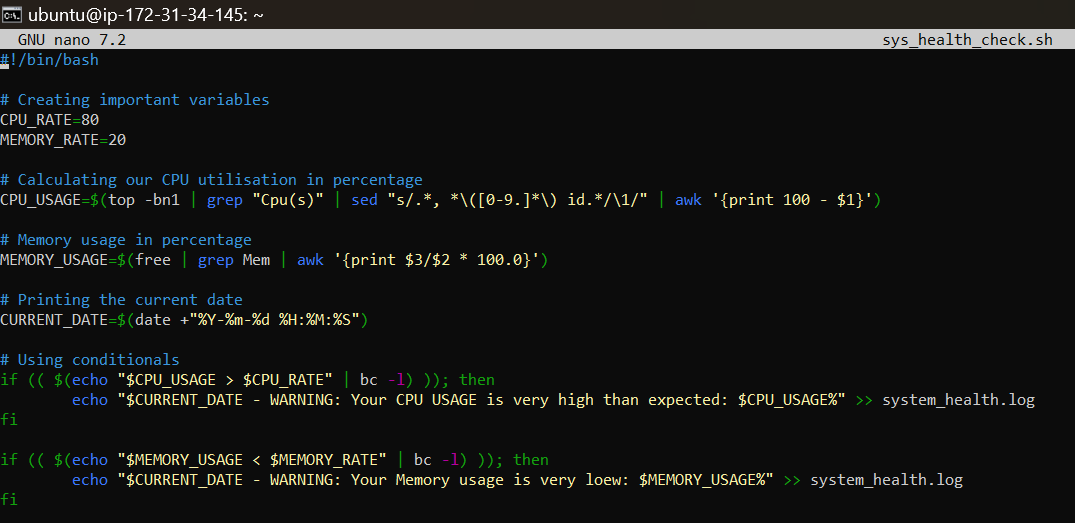

   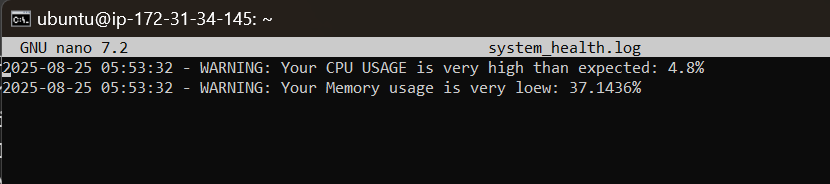



 Task 3: User Account Management

    Write a script that
    Reads a list of usernames from a file (e.g., user_list.txt)
    Creates a new user for each username
    Generates a random password for each user and saves the username and password to a file named
    credentials.txt.

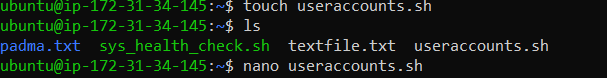

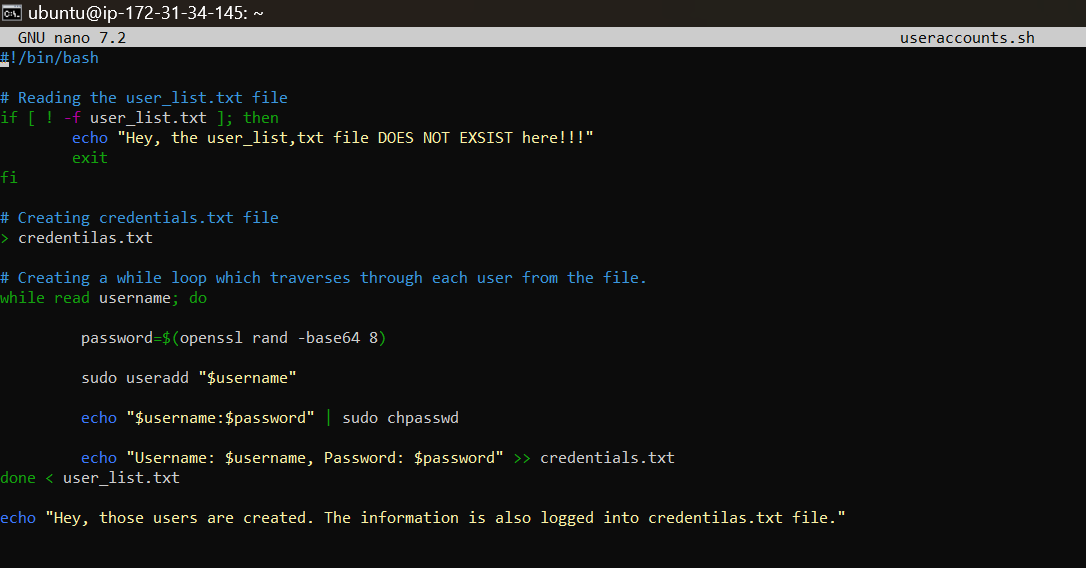

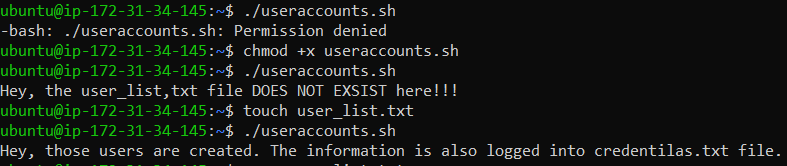

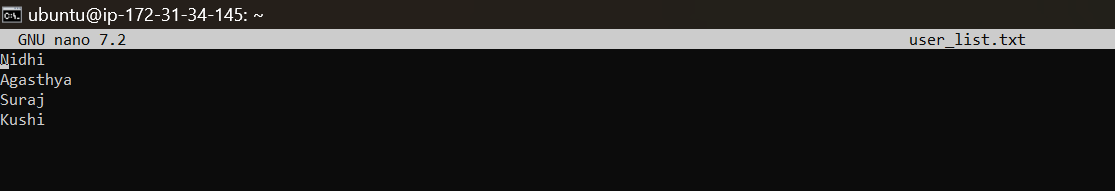

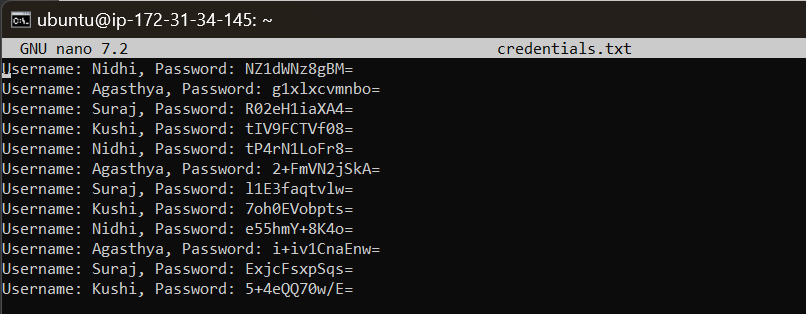





 Task 4: Automated Backup

    Create a script that
    Takes a directory path as input from the user
    Compresses the directory into a .tar.gz file
    Saves the compressed file with a name that includes the current date (e.g., backup_2023-08-20.tar.gz).

    

In [ ]:
#!/bin/bash

# Prompt the user for the directory path
read -p "Enter the directory path to compress: " dir_path

# Check if the directory exists
if [ ! -d "$dir_path" ]; then
    echo "Error: The specified path is not a valid directory."
    exit 1
fi

# Get the current date
current_date=$(date +%Y-%m-%d)

# Set the backup filename
backup_filename="backup_${current_date}.tar.gz"

# Compress the directory
tar -czf "$backup_filename" -C "$(dirname "$dir_path")" "$(basename "$dir_path")"

# Check if the command succeeded
if [ $? -eq 0 ]; then
    echo " Backup created successfully: $backup_filename"
else
    echo " Error: Failed to create the backup."
fi


 Task 6: Automated Software Installation
 Write a script that
 Reads a list of software package names from a file (e.g., packages.txt)
 Installs each package using the appropriate package manager (apt, yum, etc.)
 Logs the installation status of each package.

 Step 1: Create the package list file

 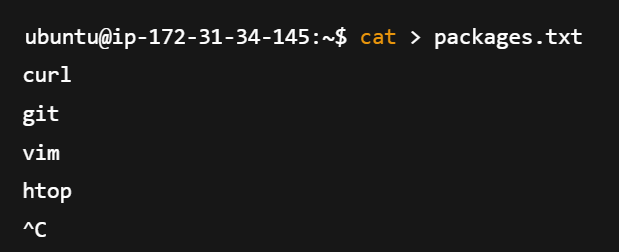

 Step 2: Create the script file


In [ ]:

ubuntu@ip-172-31-34-145:~$ cat > install_packages.sh
#!/bin/bash

PACKAGE_FILE="packages.txt"
LOG_FILE="installation_log.txt"

if [[ ! -f "$PACKAGE_FILE" ]]; then
  echo " Error: Package list file '$PACKAGE_FILE' not found!"
  exit 1
fi

if command -v apt >/dev/null 2>&1; then
  PKG_MANAGER="apt"
  INSTALL_CMD="sudo apt install -y"
elif command -v yum >/dev/null 2>&1; then
  PKG_MANAGER="yum"
  INSTALL_CMD="sudo yum install -y"
else
  echo " No supported package manager found (apt or yum)."
  exit 1
fi

echo " Using package manager: $PKG_MANAGER"
echo " Installation log: $LOG_FILE"
echo "-----------------------------------" > "$LOG_FILE"

while IFS= read -r package || [[ -n "$package" ]]; do
  if [[ -z "$package" ]]; then
    continue
  fi
  echo "🔹 Installing package: $package ..."
  if $INSTALL_CMD "$package" >/dev/null 2>&1; then
    echo " Successfully installed: $package" | tee -a "$LOG_FILE"
  else
    echo " Failed to install: $package" | tee -a "$LOG_FILE"
  fi
done < "$PACKAGE_FILE"

echo "-----------------------------------" >> "$LOG_FILE"
echo " Installation process completed. Check $LOG_FILE for details."
^C



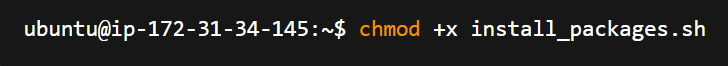

In [ ]:
ubuntu@ip-172-31-34-145:~$ ./install_packages.sh
 Using package manager: apt
 Installation log: installation_log.txt
-----------------------------------
🔹 Installing package: curl ...
 Successfully installed: curl
🔹 Installing package: git ...
 Successfully installed: git
🔹 Installing package: vim ...
 Successfully installed: vim
🔹 Installing package: htop ...
 Successfully installed: htop
-----------------------------------
 Installation process completed. Check installation_log.txt for details.


Task 7: Text File Processing
 Create a script that
 Takes a text file as input
 Counts and displays the number of lines, words, and characters in the file
 Finds and displays the longest word in the file.

In [ ]:
#!/usr/bin/env python3

# Text File Processing Script with Green Output

file_name = input("Enter the full path of the text file: ")

GREEN = "\033[32m"
RESET = "\033[0m"

try:
    with open(file_name, 'r') as file:
        text = file.read()
        file.seek(0)
        lines = file.readlines()
        num_lines = len(lines)
        words = text.split()
        num_words = len(words)
        num_chars = len(text)
        longest_word = max(words, key=len) if words else ""

        print(f"{GREEN}Number of lines: {num_lines}{RESET}")
        print(f"{GREEN}Number of words: {num_words}{RESET}")
        print(f"{GREEN}Number of characters: {num_chars}{RESET}")
        print(f"{GREEN}Longest word: {longest_word}{RESET}")

except FileNotFoundError:
    print(f"{GREEN}Error: File not found. Please check the path.{RESET}")
except Exception as e:
    print(f"{GREEN}An error occurred: {e}{RESET}")


 Task 5: Simple To-Do List
 Create a Bash script that
 Implements a simple command-line to-do list
 Allows the user to add tasks, view tasks, and remove tasks
 Saves the tasks to a file (e.g., todo.txt).

In [ ]:
#!/bin/bash

TODO_FILE="$HOME/todo.txt"

# Create todo file if it doesn't exist
touch "$TODO_FILE"

while true; do
    echo "==========================="
    echo "      TO-DO LIST MENU      "
    echo "==========================="
    echo "1) View Tasks"
    echo "2) Add Task"
    echo "3) Remove Task"
    echo "4) Exit"
    echo -n "Choose an option [1-4]: "
    read choice

    case $choice in
        1)
            echo "------ YOUR TASKS ------"
            if [ ! -s "$TODO_FILE" ]; then
                echo "No tasks found!"
            else
                nl -w2 -s'. ' "$TODO_FILE"
            fi
            ;;
        2)
            echo -n "Enter the task: "
            read task
            echo "$task" >> "$TODO_FILE"
            echo "Task added!"
            ;;
        3)
            if [ ! -s "$TODO_FILE" ]; then
                echo "No tasks to remove!"
            else
                echo "Select the number of the task to remove:"
                nl -w2 -s'. ' "$TODO_FILE"
                echo -n "Task number: "
                read task_num
                sed -i "${task_num}d" "$TODO_FILE"
                echo "Task removed!"
            fi
            ;;
        4)
            echo "Exiting To-Do List. Bye!"
            break
            ;;
        *)
            echo "Invalid option. Please choose 1-4."
            ;;
    esac
    echo ""
done
